In [ ]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp, norm
import os

###############################
# 1. The permutation_test function 
#    (taken from your code snippet, with minor naming edits)
###############################
def permutation_test(measurement_image, patch_mask, interpatch_mask, n_iterations=10000, alpha=0.05):
    """
    Permutation test of patch vs. interpatch mean intensity ratio.
    - measurement_image: 2D array of intensities (float or int).
    - patch_mask, interpatch_mask: same shape as measurement_image, booleans.
    - n_iterations: how many shuffles to perform.
    - alpha: significance level (0.05 => 95% CI).
    
    Returns: (real_ratio, shuffle_ratios, (low95, high95), significant_bool)
    """
    # Extract real patch vs interpatch intensities
    patch_vals = measurement_image[patch_mask]
    interpatch_vals = measurement_image[interpatch_mask]

    # Compute the real ratio
    patch_mean = patch_vals.mean()
    interpatch_mean = interpatch_vals.mean()
    if interpatch_mean == 0:
        real_ratio = np.nan
    else:
        real_ratio = patch_mean / interpatch_mean

    # Flatten all intensities for shuffling
    all_vals = measurement_image.ravel().copy()
    patch_indices = np.where(patch_mask.ravel())[0]
    interpatch_indices = np.where(interpatch_mask.ravel())[0]

    # Shuffle distribution
    shuffle_ratios = []
    for _ in range(n_iterations):
        np.random.shuffle(all_vals)  # Shuffle in-place
        p_mean = all_vals[patch_indices].mean()
        i_mean = all_vals[interpatch_indices].mean()
        ratio = p_mean / i_mean if i_mean != 0 else np.nan
        shuffle_ratios.append(ratio)

    shuffle_ratios = np.array(shuffle_ratios)
    # Compute confidence bounds
    lower_bound = np.percentile(shuffle_ratios, 100 * alpha / 2)
    upper_bound = np.percentile(shuffle_ratios, 100 * (1 - alpha / 2))
    significant = (real_ratio < lower_bound) or (real_ratio > upper_bound)

    return real_ratio, shuffle_ratios, (lower_bound, upper_bound), significant


###############################
# 2. Example main code: 
#    Multiple animals, multiple regions, 
#    patch/interpatch masks in TIF files, 
#    and measurement images (e.g. RSC.tif, ACC.tif).
###############################

if __name__ == "__main__":
    # Example: we have these animals and these sub-regions
    animal_ids = [99, 118, 80, 82]
    region_names = ["left_bottom", "left_middle", "left_upper"]
    
    # We can measure multiple "areas" (channels), for instance RSC and ACC
    areas = ["RSC", "ACC"]

    # We'll store permutation test results in a structure like:
    # results[(animal_id, region, area)] = (real_ratio, (low, high), significant)
    results = {}

    for aid in animal_ids:
        for region in region_names:
            for area in areas:
                # Build file paths 
                base_dir = f"./{aid}/{region}"
                measurement_path = os.path.join(base_dir, f"{area}.tif")
                patch_mask_path = os.path.join(base_dir, "patchmask.tif")
                interpatch_mask_path = os.path.join(base_dir, "interpatchmask.tif")

                # Load images (2D arrays)
                measurement_img = tifffile.imread(measurement_path).astype(float)
                patchmask_img = tifffile.imread(patch_mask_path)
                interpatchmask_img = tifffile.imread(interpatch_mask_path)

                # Convert mask images to boolean (assuming 255=white, 0=black)
                patch_mask = (patchmask_img == 255)
                interpatch_mask = (interpatchmask_img == 255)

                # Perform the permutation test
                real_ratio, shuffle_ratios, (low95, high95), significant = permutation_test(
                    measurement_img,
                    patch_mask,
                    interpatch_mask,
                    n_iterations=10000,
                    alpha=0.05
                )

                # Store the results
                results[(aid, region, area)] = (real_ratio, (low95, high95), significant)
    
    ###############################
    # 3. Print or summarize results
    ###############################
    for key, val in results.items():
        aid, region, area = key
        real_ratio, (low95, high95), significant = val
        print(f"Animal {aid}, region={region}, area={area}: ratio={real_ratio:.3f}, "
              f"95% CI=({low95:.3f}, {high95:.3f}), significant={significant}")

    ###############################
    # 4. (Optional) Plot shuffle distribution 
    #    for one example (aid, region, area)
    ###############################
    example_key = (99, "left_bottom", "RSC")  # pick whichever you like
    if example_key in results:
        # We need to re-run the test with the same data but keep shuffle_ratios
        measurement_img = tifffile.imread(f"./{example_key[0]}/{example_key[1]}/{example_key[2]}.tif").astype(float)
        patchmask_img = tifffile.imread(f"./{example_key[0]}/{example_key[1]}/patchmask.tif")
        interpatchmask_img = tifffile.imread(f"./{example_key[0]}/{example_key[1]}/interpatchmask.tif")
        patch_mask = (patchmask_img == 255)
        interpatch_mask = (interpatchmask_img == 255)

        real_ratio, shuffle_ratios, (low95, high95), significant = permutation_test(
            measurement_img,
            patch_mask,
            interpatch_mask,
            n_iterations=10000,
            alpha=0.05
        )

        plt.figure(figsize=(6,4))
        plt.hist(shuffle_ratios, bins=100, color='gray', alpha=0.7, edgecolor='none')
        plt.axvline(real_ratio, color='r', linestyle='--', label=f"Real ratio = {real_ratio:.3f}")
        plt.axvspan(low95, high95, color='blue', alpha=0.1, label="95% shuffle CI")
        plt.xlabel("Patch/Interpatch Ratio (Shuffled)")
        plt.ylabel("Counts")
        plt.title(f"{example_key}: PermTest (significant={significant})")
        plt.legend()
        plt.tight_layout()
        plt.show()


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


--- left_bottom / RSC ---
  N_patch=47140, N_interpatch=48129
  Ratio = 0.808
  95% CI = (0.993, 1.007)
  Significant? True

--- left_bottom / ACC ---
  N_patch=47140, N_interpatch=48129
  Ratio = 1.130
  95% CI = (0.993, 1.007)
  Significant? True

--- left_middle / RSC ---
  N_patch=48385, N_interpatch=47270
  Ratio = 1.089
  95% CI = (0.993, 1.007)
  Significant? True

--- left_middle / ACC ---
  N_patch=48385, N_interpatch=47270
  Ratio = 1.082
  95% CI = (0.993, 1.007)
  Significant? True

--- left_upper / RSC ---
  N_patch=36218, N_interpatch=37060
  Ratio = 1.735
  95% CI = (0.991, 1.009)
  Significant? True

--- left_upper / ACC ---
  N_patch=36218, N_interpatch=37060
  Ratio = 1.168
  95% CI = (0.992, 1.008)
  Significant? True



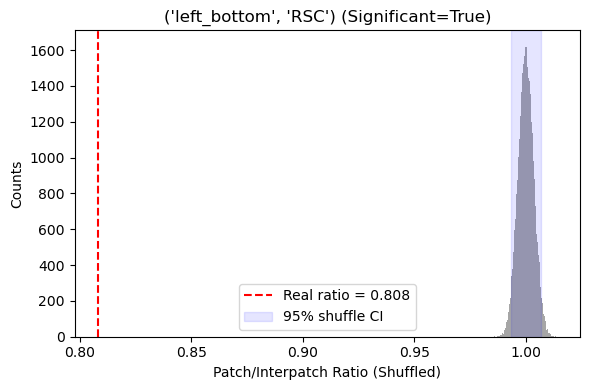

In [2]:
import numpy as np
import tifffile
import matplotlib.pyplot as plt
import os

def permutation_test_combined(patch_values, interpatch_values, n_iterations=10000, alpha=0.05):
    """
    A 'summary' permutation test for patch vs. interpatch across a combined dataset.

    - patch_values: 1D array of intensities from all patch pixels (for a given region & area).
    - interpatch_values: 1D array from all interpatch pixels.
    - We shuffle the entire set of values, then the first len(patch_values) become 'patch'
      and the remainder become 'interpatch', computing ratio each time.
    - Returns: (real_ratio, shuffle_ratios, (low95, high95), significant_bool)
    """
    # Real ratio
    real_patch_mean = patch_values.mean()
    real_inter_mean = interpatch_values.mean()
    real_ratio = real_patch_mean / real_inter_mean if real_inter_mean != 0 else np.nan

    # Combine all intensities
    all_vals = np.concatenate([patch_values, interpatch_values])
    n_patch = len(patch_values)
    n_inter = len(interpatch_values)

    shuffle_ratios = []
    for _ in range(n_iterations):
        np.random.shuffle(all_vals)
        p_mean = all_vals[:n_patch].mean()
        i_mean = all_vals[n_patch:].mean()
        ratio = p_mean / i_mean if i_mean != 0 else np.nan
        shuffle_ratios.append(ratio)

    shuffle_ratios = np.array(shuffle_ratios)
    lower_bound = np.percentile(shuffle_ratios, 100 * alpha / 2)
    upper_bound = np.percentile(shuffle_ratios, 100 * (1 - alpha / 2))
    significant = (real_ratio < lower_bound) or (real_ratio > upper_bound)

    return real_ratio, shuffle_ratios, (lower_bound, upper_bound), significant


if __name__ == "__main__":
    # 1) Define your animals, regions, areas
    animal_ids = [99, 118, 80, 82]                  # Example animals
    region_names = ["left_bottom", "left_middle", "left_upper"]
    areas = ["RSC", "ACC"]                          # Two areas you want to measure

    # 2) We'll store intensities in a dictionary keyed by (region, area).
    #    For each (region, area), we'll accumulate patch intensities and interpatch intensities from all animals.
    all_data = {}  
    for region in region_names:
        for area in areas:
            # We'll store them as lists, which we'll later concatenate into arrays
            all_data[(region, area)] = {
                "patch": [],
                "interpatch": []
            }

    # 3) Loop over animals, regions, areas to collect intensities
    for aid in animal_ids:
        for region in region_names:
            for area in areas:
                base_dir = f"./{aid}/{region}"
                measurement_path = os.path.join(base_dir, f"{area}.tif")
                patchmask_path = os.path.join(base_dir, "patchmask.tif")
                interpatchmask_path = os.path.join(base_dir, "interpatchmask.tif")

                # Load images (2D)
                measurement_img = tifffile.imread(measurement_path).astype(float)
                patchmask_img = tifffile.imread(patchmask_path)
                interpatchmask_img = tifffile.imread(interpatchmask_path)

                # Convert mask to boolean (assuming 255 => True)
                patch_mask = (patchmask_img == 255)
                interpatch_mask = (interpatchmask_img == 255)

                # Extract intensities
                patch_vals = measurement_img[patch_mask]
                interpatch_vals = measurement_img[interpatch_mask]

                ###########################################
                # (Optional) Normalize each image's intensities 
                # so that patch mean = 1.0
                ###########################################
                patch_mean = patch_vals.mean()
                if patch_mean > 0:
                    patch_vals = patch_vals / patch_mean
                    interpatch_vals = interpatch_vals / patch_mean

                # Add to the dictionary
                all_data[(region, area)]["patch"].append(patch_vals)
                all_data[(region, area)]["interpatch"].append(interpatch_vals)

    # 4) Now run a summary permutation test for each (region, area) across animals
    results = {}  # Will store the final stats for each (region, area)

    for region in region_names:
        for area in areas:
            # Combine patch arrays, interpatch arrays
            patch_all = np.concatenate(all_data[(region, area)]["patch"])
            interpatch_all = np.concatenate(all_data[(region, area)]["interpatch"])

            # Run the combined permutation test
            real_ratio, shuffle_ratios, (low95, high95), significant = permutation_test_combined(
                patch_all, 
                interpatch_all,
                n_iterations=50000,
                alpha=0.05
            )

            # Store or print the result
            results[(region, area)] = (real_ratio, (low95, high95), significant, shuffle_ratios)

            print(f"--- {region} / {area} ---")
            print(f"  N_patch={len(patch_all)}, N_interpatch={len(interpatch_all)}")
            print(f"  Ratio = {real_ratio:.3f}")
            print(f"  95% CI = ({low95:.3f}, {high95:.3f})")
            print(f"  Significant? {significant}")
            print()

    # 5) (Optional) Plot an example shuffle distribution for one region/area
    # Pick whichever region & area you like:
    example_key = ("left_bottom", "RSC")
    if example_key in results:
        # Because we stored shuffle_ratios in 'results' as the 4th element:
        real_ratio, (low95, high95), significant, shuffle_ratios = results[example_key]
    
        plt.figure(figsize=(6,4))
        plt.hist(shuffle_ratios, bins=100, color='gray', alpha=0.7, edgecolor='none')
        plt.axvline(real_ratio, color='r', linestyle='--', label=f"Real ratio = {real_ratio:.3f}")
        plt.axvspan(low95, high95, color='blue', alpha=0.1, label="95% shuffle CI")
        plt.xlabel("Patch/Interpatch Ratio (Shuffled)")
        plt.ylabel("Counts")
        plt.title(f"{example_key} (Significant={significant})")
        plt.legend()
        plt.tight_layout()
        plt.show()



In [12]:
# -----------------------------
# Cell to be added AFTER the original code
# -----------------------------

import os
import matplotlib.pyplot as plt
import numpy as np
# After plotting histogram and lines:
from matplotlib.ticker import MaxNLocator

def save_permutation_plot(
    region_name: str,
    area_name: str,
    real_ratio: float,
    ci_bounds: tuple[float, float],
    significant: bool,
    shuffle_ratios: np.ndarray,
    bins: int = 100,
    figsize: tuple = (6, 4),
    alpha_hist: float = 0.7,
    facecolor: str = 'gray',
    edgecolor: str = 'none',
    line_width: int = 1,
    line_color: str = 'r',
    line_style: str = '--',
    ci_color: str = 'blue',
    ci_alpha: float = 0.1,
    label_fontsize: int = 12,
    tick_label_fontsize: int = 10,
    title_fontsize: int = 14,
    legend_fontsize: int = 10,
    
    # -------------------
    # Toggles for showing or hiding text/legend
    # -------------------
    show_legend: bool = True,
    show_title: bool = True,
    show_axes_labels: bool = True,
    
    dpi: int = 300,
    out_dir: str = "./perm_plots"
):
    """
    Saves a histogram of shuffle_ratios with a vertical line at 'real_ratio' 
    and a shaded region from ci_bounds[0] to ci_bounds[1].

    Parameters
    ----------
    region_name : str
        The region label (e.g., "left_bottom").
    area_name : str
        The area label (e.g., "RSC").
    real_ratio : float
        Observed patch/interpatch ratio.
    ci_bounds : (float, float)
        (lower_bound, upper_bound) from the permutation test.
    significant : bool
        Whether the observed ratio is outside the shuffle CI.
    shuffle_ratios : np.ndarray
        1D array of shuffle ratios from the permutation test.
    bins : int
        Number of bins for the histogram.
    figsize : (width, height)
        Size of the figure in inches.
    alpha_hist : float
        Alpha (transparency) for the histogram bars.
    facecolor : str
        Face color of the histogram bars.
    edgecolor : str
        Edge color of the histogram bars.
    line_color : str
        Color for the vertical line at real_ratio.
    line_style : str
        Line style for the vertical line.
    ci_color : str
        Color for the confidence interval shading.
    ci_alpha : float
        Alpha (transparency) for the confidence interval shading.
    label_fontsize : int
        Font size for axis labels.
    tick_label_fontsize : int
        Font size for tick labels.
    title_fontsize : int
        Font size for the main title / text added to title.
    legend_fontsize : int
        Font size for the legend.
    show_legend : bool
        Whether to display the legend box.
    show_title : bool
        Whether to display the main title (region_name / area_name).
    show_axes_labels : bool
        Whether to display X and Y axis labels (Patch/Interpatch Ratio, etc.).
    dpi : int
        Resolution (dots per inch) for the saved figure.
    out_dir : str
        Directory path to save the output .jpg files.

    Notes
    -----
    The output filename will be something like "left_bottom_RSC_perm.jpg".
    """

    os.makedirs(out_dir, exist_ok=True)

    fig, ax = plt.subplots(figsize=figsize)

    # Plot the shuffle distribution
    counts, bin_edges, _ = ax.hist(
        shuffle_ratios, 
        bins=bins, 
        color=facecolor, 
        alpha=alpha_hist,
        edgecolor=edgecolor,
        label='Shuffled Ratios'
    )

    # Add a vertical line at the real ratio
    ax.axvline(real_ratio, color=line_color, linestyle=line_style, 
               label=f"Real ratio = {real_ratio:.3f}")

    # Shade the confidence interval
    lower_ci, upper_ci = ci_bounds
    ax.axvspan(lower_ci, upper_ci, linewidth = line_width, color=ci_color, alpha=ci_alpha, 
               label=f"95% CI = ({lower_ci:.3f}, {upper_ci:.3f})")

    # Optionally set axis labels
    if show_axes_labels:
        ax.set_xlabel("Patch/Interpatch Ratio (Shuffled)", fontsize=label_fontsize)
        ax.set_ylabel("Counts", fontsize=label_fontsize)

    # Tick label font sizes
    ax.tick_params(axis='both', labelsize=tick_label_fontsize)
    # Suppose you only want up to 6 ticks on the x-axis:
    ax.xaxis.set_major_locator(MaxNLocator(nbins=3))

    # Title
    if show_title:
        ax.set_title(
            f"{region_name} / {area_name} (Significant={significant})", 
            fontsize=title_fontsize
        )

    # Possibly show legend
    if show_legend:
        ax.legend(fontsize=legend_fontsize)

    plt.tight_layout()

    # Save figure
    filename = f"{region_name}_{area_name}_perm.jpg"
    out_path = os.path.join(out_dir, filename)
    plt.savefig(out_path, dpi=dpi, format='jpg')
    plt.close(fig)

In [15]:
# ----------------------------------------------------
# Example usage: loop over each region & area in `results`
# ----------------------------------------------------
plot_output_dir = "./perm_plots"
os.makedirs(plot_output_dir, exist_ok=True)

for (region, area), val in results.items():
    real_ratio, (low95, high95), significant, shuffle_ratios = val

    save_permutation_plot(
        region_name=region,
        area_name=area,
        real_ratio=real_ratio,
        ci_bounds=(low95, high95),
        significant=significant,
        shuffle_ratios=shuffle_ratios,

        # Style toggles
        show_legend=True,       # set False to hide legend
        show_title=False,        # set False to hide main title
        show_axes_labels=False,  # set False to hide axis labels
        
        # Styling
        bins=100,
        figsize=(6, 4),
        alpha_hist=0.7,
        facecolor='gray',
        edgecolor='none',
        line_width= 2,
        line_color='r',
        line_style='--',
        ci_color='blue',
        ci_alpha=0.1,
        label_fontsize=12,
        tick_label_fontsize=18,
        title_fontsize=14,
        legend_fontsize=10,
        dpi=300,
        out_dir=plot_output_dir
    )

print(f"Done! Permutation test plots saved in: {plot_output_dir}")

Done! Permutation test plots saved in: ./perm_plots
